In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from collections import Counter

data=pd.read_csv('traffic volume.csv.csv')
data.head()


,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [3]:
data.describe()


,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [4]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


holiday           48143
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64

In [5]:
# Handling missing values for numeric columns
data['temp'].fillna(data['temp'].mean(), inplace=True)
data['rain'].fillna(data['rain'].mean(), inplace=True)
data['snow'].fillna(data['snow'].mean(), inplace=True)

# Check the most frequent weather condition
print(Counter(data['weather']))

# Handling missing values for categorical columns
data['weather'].fillna('Clouds', inplace=True)
data['holiday'].fillna('None', inplace=True)

# Encode categorical columns (Label Encoding)
le = LabelEncoder()
data['weather'] = le.fit_transform(data['weather'])
data['holiday'] = le.fit_transform(data['holiday'])



Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


C:\Users\harsh\AppData\Local\Temp\ipykernel_28536\1605767224.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['temp'].fillna(data['temp'].mean(), inplace=True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_28536\1605767224.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [6]:
# Select numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate correlation
cor = numeric_data.corr()
print(cor)




                 holiday      temp      rain      snow   weather  \
holiday         1.000000 -0.000472  0.000066  0.000432 -0.004328   
temp           -0.000472  1.000000  0.009070 -0.019758 -0.033559   
rain            0.000066  0.009070  1.000000 -0.000090  0.009542   
snow            0.000432 -0.019758 -0.000090  1.000000  0.036662   
weather        -0.004328 -0.033559  0.009542  0.036662  1.000000   
traffic_volume  0.018676  0.130034  0.004714  0.000735 -0.040035   

                traffic_volume  
holiday               0.018676  
temp                  0.130034  
rain                  0.004714  
snow                  0.000735  
weather              -0.040035  
traffic_volume        1.000000  


<Axes: >

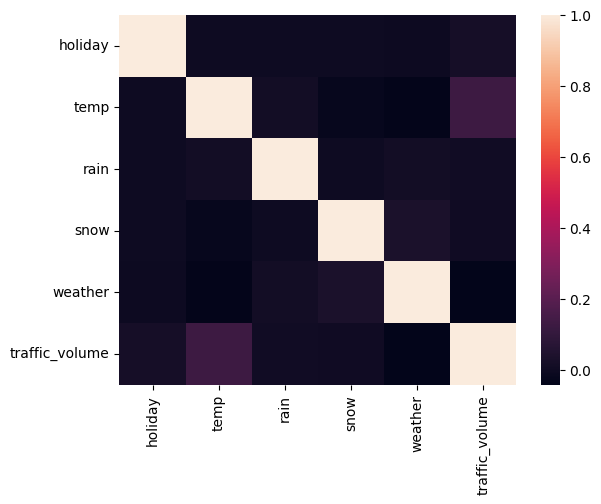

In [7]:
sns.heatmap(cor)

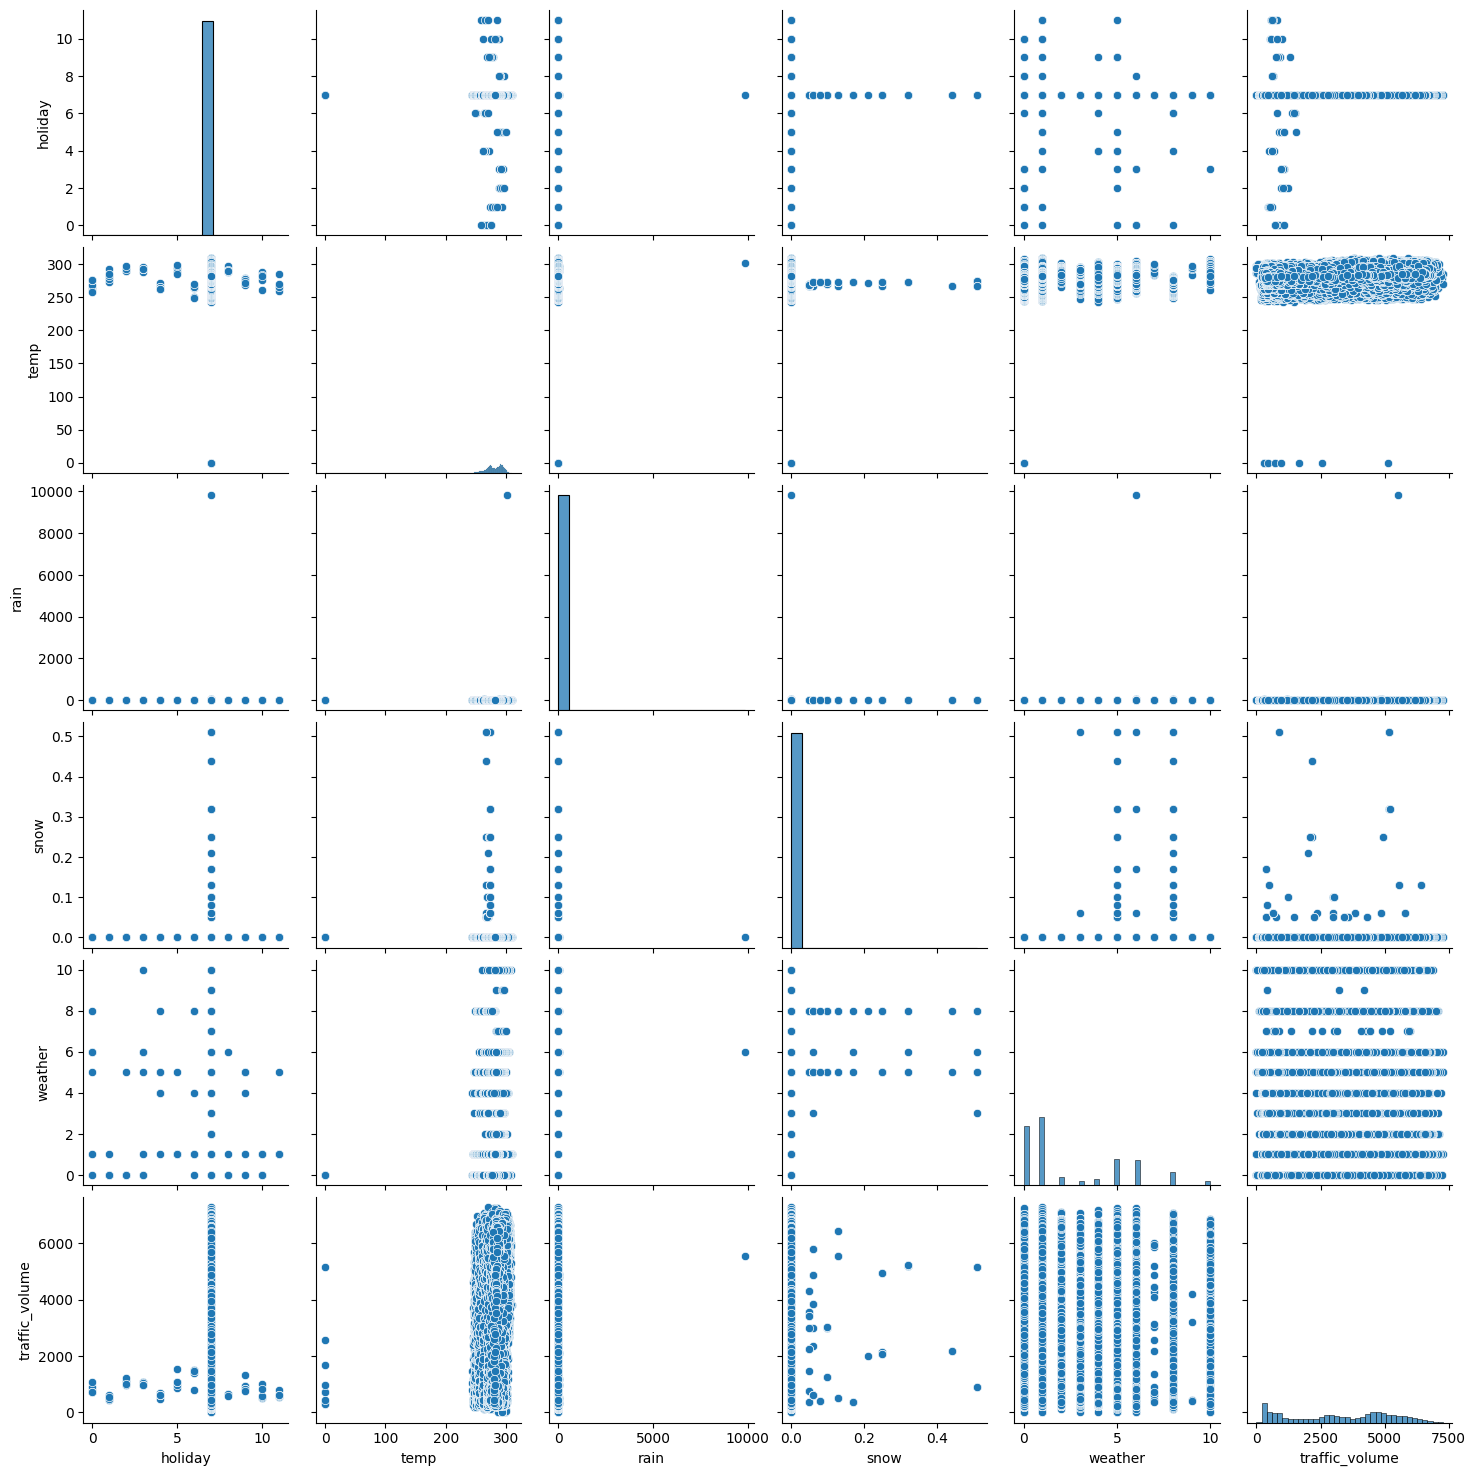

In [8]:
sns.pairplot(data)

<Axes: >

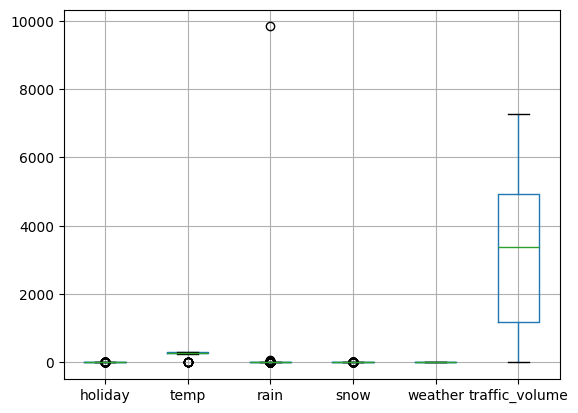

In [9]:
data.boxplot()

In [10]:
data[["day", "month", "year"]] = data["date"].str.split("-", expand=True)
data[["hours", "minutes", "seconds"]] = data["Time"].str.split(":", expand=True)
data.drop(columns=['date', 'Time'], axis=1, inplace=True)
print(data.head())

   holiday    temp  rain  snow  weather  traffic_volume day month  year hours  \
0        7  288.28   0.0   0.0        1            5545  02    10  2012    09   
1        7  289.36   0.0   0.0        1            4516  02    10  2012    10   
2        7  289.58   0.0   0.0        1            4767  02    10  2012    11   
3        7  290.13   0.0   0.0        1            5026  02    10  2012    12   
4        7  291.14   0.0   0.0        1            4918  02    10  2012    13   

  minutes seconds  
0      00      00  
1      00      00  
2      00      00  
3      00      00  
4      00      00  


In [11]:
from sklearn.preprocessing import scale
y = data['traffic_volume']
x = data.drop(columns=['traffic_volume'])

# Step 5: Save original column names
names = x.columns

# Step 6: Scale the input features
x = scale(x)

# Step 7: Convert scaled data back to DataFrame
x = pd.DataFrame(x, columns=names)

# Step 8: Show result
print(x.head())

    holiday      temp      rain      snow   weather       day    month  \
0  0.015856  0.530485 -0.007463 -0.027235 -0.566452 -1.574903  1.02758   
1  0.015856  0.611467 -0.007463 -0.027235 -0.566452 -1.574903  1.02758   
2  0.015856  0.627964 -0.007463 -0.027235 -0.566452 -1.574903  1.02758   
3  0.015856  0.669205 -0.007463 -0.027235 -0.566452 -1.574903  1.02758   
4  0.015856  0.744939 -0.007463 -0.027235 -0.566452 -1.574903  1.02758   

       year     hours  minutes  seconds  
0 -1.855294 -0.345548      0.0      0.0  
1 -1.855294 -0.201459      0.0      0.0  
2 -1.855294 -0.057371      0.0      0.0  
3 -1.855294  0.086718      0.0      0.0  
4 -1.855294  0.230807      0.0      0.0  


In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [13]:
# Import necessary libraries
from sklearn import linear_model
from sklearn import  tree
from sklearn import  ensemble
from sklearn import  svm
import xgboost

lin_reg = linear_model.LinearRegression()
Dtree = tree.DecisionTreeRegressor()
Rand = ensemble.RandomForestRegressor()
svr = svm.SVR()
XGB = xgboost.XGBRegressor()



In [14]:
# Train models
lin_reg.fit(x_train, y_train)
Dtree.fit(x_train, y_train)
Rand.fit(x_train, y_train)
svr.fit(x_train, y_train)
XGB.fit(x_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [15]:
p1 = lin_reg.predict(x_train)
p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)

In [16]:
from sklearn import metrics

print(metrics.r2_score(p1, y_train))
print(metrics.r2_score(p2, y_train))
print(metrics.r2_score(p3, y_train))
print(metrics.r2_score(p4, y_train))
print(metrics.r2_score(p5, y_train))

-5.517285423636863
1.0
0.9747095168532066
-12.18810423138228
0.8472604751586914


In [17]:
p1 = lin_reg.predict(x_test)
p2 = Dtree.predict(x_test)
p3 = Rand.predict(x_test)
p4 = svr.predict(x_test)
p5 = XGB.predict(x_test)

print(metrics.r2_score(p1, y_test))
print(metrics.r2_score(p2, y_test))
print(metrics.r2_score(p3, y_test))
print(metrics.r2_score(p4, y_test))
print(metrics.r2_score(p5, y_test))

-5.39939639832218
0.6883836579571029
0.8019947379438109
-11.972215715232423
0.8065614104270935


In [18]:
MSE = metrics.mean_squared_error(p3, y_test)

np.sqrt(MSE)

np.float64(800.7015770127742)

In [19]:
import pickle

# Save the Random Forest model
pickle.dump(Rand, open("model.pkl", 'wb'))

# Save the encoder (if used)
pickle.dump(le, open("encoder.pkl", 'wb'))

In [21]:
import joblib

joblib.dump(XGB,'traffic_volume_project_model.pkl')

['traffic_volume_project_model.pkl']

In [3]:
import pickle